In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Problem 1

1. $$ \mathcal{L} = \sum_{i = 1}^l \left(y_i - \check{y}\right)^2 \rightarrow \min_{\breve{y}} $$
$$ \mathcal{L}_{\check{y}}' = 2 \sum_{i = 1}^l \left(\check{y}^* - y_i\right) = 2 l \check{y}^* - 2 \sum_{i = 1}^l y_i = 0 $$
$$ \check{y}^* = \frac{1}{l} \sum_{i = 1}^l y_i $$

2. $$ g_\mathbf{w}(x) = a + bx $$
$$ \left(\begin{array}{cc}
n & \sum\limits_{i = 1}^n x_i \\
\sum\limits_{i = 1}^n x_i & \sum\limits_{i = 1}^n x_i^2
\end{array}\right)
\left(\begin{array}{c}
a \\
b
\end{array}\right)=
\left(\begin{array}{c}
\sum\limits_{i = 1}^n y_i \\
\sum\limits_{i = 1}^n x_i y_i
\end{array}\right) $$
$$ b^* = \frac{n \sum\limits_{i = 1}^n x_i y_i - \left(\sum\limits_{i = 1}^n x_i\right) \left(\sum\limits_{i = 1}^n y_i\right)}{n \sum\limits_{i = 1}^n x_i^2 - \left(\sum\limits_{i = 1}^n x_i\right)^2} $$
$$ a^* = \frac{\sum\limits_{i = 1}^n y_i - b^* \sum\limits_{i = 1}^n x_i}{n} $$
Из вида коэффициента $a^*$ сразу видно, что прямая проходит через $\left(\bar{x}, \bar{y}\right)$.
В случае многомерной регрессии $m$-мерная гиперплоскость, построенная по МНК, будет проходить через точку $\left(\bar{x}^1, \bar{x}^2, \dots, \bar{x}^m, \bar{y}\right)$.

In [2]:
df = sns.load_dataset('anscombe')

df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [3]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f"Dataset {dataset}:")
    subset = df[df['dataset'] == dataset]
    print(f"Variance of x: {subset['x'].var()}")
    print(f"Variance of y: {subset['y'].var()}")
    print(f"Pearson correlation coefficient: {subset['x'].corr(subset['y'])}")
    print()

Dataset I:
Variance of x: 11.0
Variance of y: 4.127269090909091
Pearson correlation coefficient: 0.81642051634484

Dataset II:
Variance of x: 11.0
Variance of y: 4.127629090909091
Pearson correlation coefficient: 0.8162365060002428

Dataset III:
Variance of x: 11.0
Variance of y: 4.12262
Pearson correlation coefficient: 0.8162867394895984

Dataset IV:
Variance of x: 11.0
Variance of y: 4.123249090909091
Pearson correlation coefficient: 0.8165214368885028



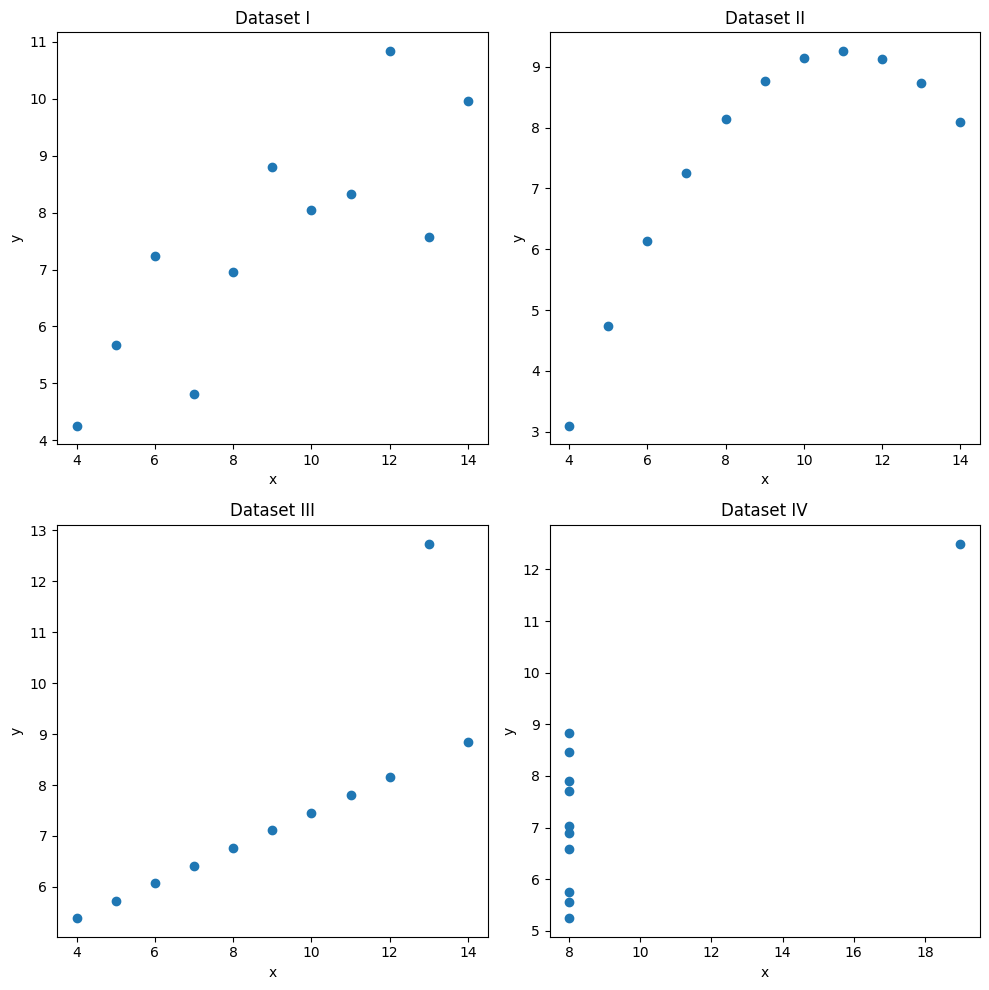

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    subset = df[df['dataset'] == dataset]
    ax = axs[i // 2][i % 2]
    ax.scatter(subset['x'], subset['y'])
    ax.set_title(f"Dataset {dataset}")
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()

# Problem 2

In [15]:
rows, columns = 5, 3

A = np.random.random(size=(rows, columns))
A_ext = np.concatenate((A, np.ones((rows, 1))), axis=1)
A_mean = A - np.mean(A, axis=0)

B_mean = np.linalg.inv(A_mean.T @ A_mean)
B_ext = np.linalg.inv(A_ext.T @ A_ext)

B_mean, B_ext[:columns, :columns]

(array([[ 7.25542498, -7.01279038, -3.36895412],
        [-7.01279038, 14.35496733,  4.24457787],
        [-3.36895412,  4.24457787,  3.30947747]]),
 array([[ 7.25542498, -7.01279038, -3.36895412],
        [-7.01279038, 14.35496733,  4.24457787],
        [-3.36895412,  4.24457787,  3.30947747]]))

# Problem 3

Рассмотрим систему $ X w = y $, где $ X \in \mathbb{R}^{m \times n} $, $ m < n $, $ \operatorname{rank} X = m $

Рассмотрим частное решение $ w_{ln} = X^T \left(X X^T\right)^{-1} y $ ($ X X^T $ обратима, так как $ X $ имеет полный ранг). Покажем, что это решение минимизирует $ l_2 $-норму весов $ ||w|| $. 

Пусть $ X w = y $, тогда $ X \left(w - w_{ln}\right) = 0 $ и $ \left(w - w_{ln}\right)^T w_{ln} = \left(w - w_{ln}\right)^T X^T \left(X X^T\right)^{-1} y = \left(X \left(w - w_{ln}\right)\right)^T \left(X X^T\right)^{-1} y = 0 $, т. е. $ \left(w - w_{ln}\right) \perp w_{ln} $, тогда $ ||w||^2 = ||w_{ln} + w - w_{ln}||^2 = ||w_{ln}||^2 + ||w - w_{ln}||^2 \geq ||w_{ln}||^2 $, т. е. $ w_{ln} $ имеет минимальную норму среди всех решений.

# Problem 4

2. Покажем, что $ u_1' = \arg \max_{||u|| = 1} ||X u||^2 $ - сингулярный вектор, и что $ ||X u_1'|| $ - наибольшее сингулярное значение $ X $.
Пусть $ u_1, u_2, \dots, u_n $ - ортонормированные собственные векторы $ X^T X $ с собственными значениями $ \sigma_1^2 \geq \dots \geq \sigma_n^2 $. Для любого $ u \in \mathbb{R}^n : ||u|| = 1 $ пусть $ u = \sum_{i = 1}^n c_i u_i $, $ \sum_{i = 1}^n c_i^2 = 1 $. $ ||X u||^2 = \left(X u\right)^T \left(X u\right) = u^T \left(X^T X\right) u = \left(\sum_{j = 1}^n c_j u_j\right)^T \left(X^T X\right) \left(\sum_{i = 1}^n c_i u_i\right) = \left(\sum_{j = 1}^n c_j u_j\right)^T \left(\sum_{i = 1}^n c_i \sigma_i^2 u_i\right) = \sum_{j = 1}^n \sum_{i = 1}^n c_i c_j \sigma_i^2 u_j^T u_i = \sum_{i = 1}^n c_i^2 \sigma_i^2 $. Тогда $ ||X u||^2 = \sum_{i = 1}^n c_i^2 \sigma_i^2 \leq \sigma_1^2 $, $ \forall u \in \mathbb{R}^n : ||u|| = 1 $. На векторе $ u_1 $, $ ||X u_1||^2 = \sigma_1^2 $. $ u_1 $ - собственный вектор $ X^T X $, т. е. сингулярный вектор $ X $. При этом $ \sigma_1^2 $ - наибольший собственный вектор $ X^T X $, т. е. наибольший сингулярный вектор $ X $.

In [16]:
A = np.random.random(size=(3, 3))
A = np.triu(A) + np.triu(A, 1).T

N = 1000
mean = np.zeros(3)
cov = A
X = np.random.multivariate_normal(mean, cov, N)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='b', marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

pca = PCA(n_components=3)
pca.fit(X)
U = pca.components_

ax.plot([0, U[0, 0]], [0, U[0, 1]], [0, U[0, 2]], c='r', linewidth=2)
ax.plot([0, U[1, 0]], [0, U[1, 1]], [0, U[1, 2]], c='g', linewidth=2)
ax.plot([0, U[2, 0]], [0, U[2, 1]], [0, U[2, 2]], c='y', linewidth=2)
plt.show()

Axes3D.get_proj = lambda self: np.dot(Axes3D.get_proj(self), np.diag([1, 1, 1, 1]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='b', marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot([0, U[0, 0]], [0, U[0, 1]], [0, U[0, 2]], c='r', linewidth=2)
ax.plot([0, U[1, 0]], [0, U[1, 1]], [0, U[1, 2]], c='g', linewidth=2)
ax.plot([0, U[2, 0]], [0, U[2, 1]], [0, U[2, 2]], c='y', linewidth=2)
plt.show()

/tmp/ipykernel_52863/1216785617.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, N)


RecursionError: maximum recursion depth exceeded

<Figure size 640x480 with 1 Axes>

RecursionError: maximum recursion depth exceeded

<Figure size 640x480 with 1 Axes>

# Problem 6*

Доказать формулу!

In [7]:
def show_old(X1, Y1, X2, Y2):
    plt.plot(X1, Y1)
    plt.plot(X2, Y2)
    plt.show()

In [8]:
def show_new(X1, Y1, X2, Y2):
    x1 = np.array([np.mean(X1), np.mean(Y1)])
    x2 = np.array([np.mean(X2), np.mean(Y2)])

    XY1 = np.vstack((X1, Y1)).T
    XY2 = np.vstack((X2, Y2)).T
    
    Xnew1 = X1 - x1[0]
    Ynew1 = Y1 - x1[1]
    Xnew2 = X2 - x2[0]
    Ynew2 = Y2 - x2[1]
    
    a = np.vstack((Xnew1, Ynew1)).T
    b = np.vstack((Xnew2, Ynew2)).T
    
    U, D, V = np.linalg.svd(a.T @ b)
    R = U @ V
    mu = -x2 + R.T @ x1
    
    new1 = XY1 @ R - mu
    plt.plot(new1[:, 0], new1[:, 1])
    plt.plot(X2, Y2)
    plt.show()

In [9]:
X1 = np.array([0.0, 1.0, 1.0, 0.0, 0.0])
Y1 = np.array([0.0, 0.0, 1.0, 1.0, 0.0])
X2 = np.array([1.5, 1.5 + 2 ** (-0.5), 1.5, 1.5 - 2 ** (-0.5), 1.5])
Y2 = np.array([1.5 - 2 ** (-0.5), 1.5, 1.5 + 2 ** (-0.5), 1.5, 1.5 - 2 ** (-0.5)])

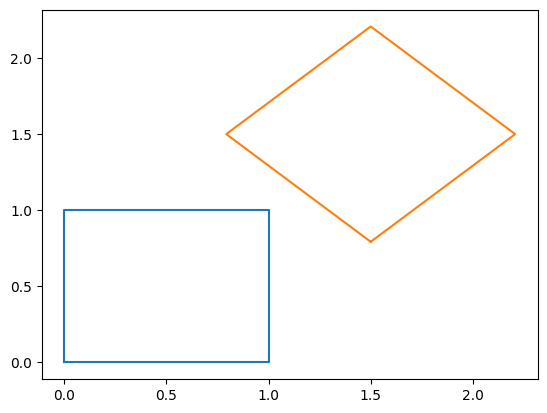

In [10]:
show_old(X1, Y1, X2, Y2)

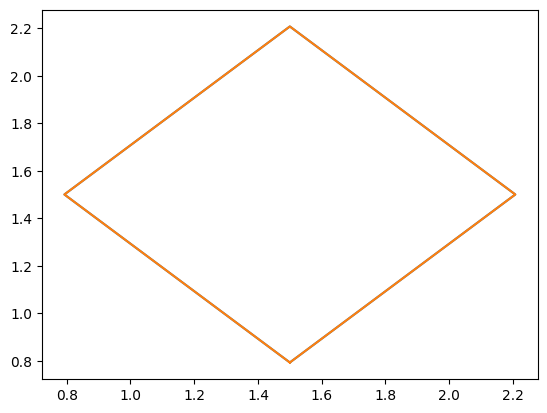

In [11]:
show_new(X1, Y1, X2, Y2)

In [12]:
X1 += np.random.uniform(-0.1, 0.1, size=5)
Y1 += np.random.uniform(-0.1, 0.1, size=5)

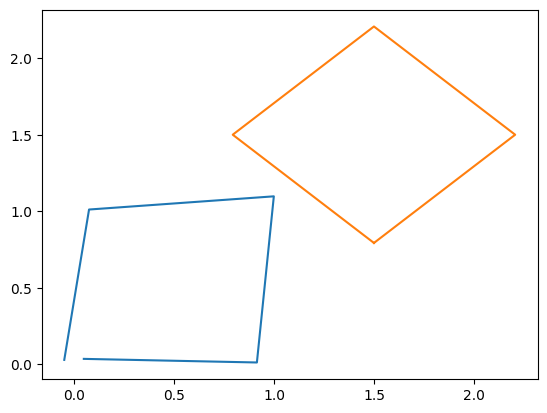

In [13]:
show_old(X1, Y1, X2, Y2)

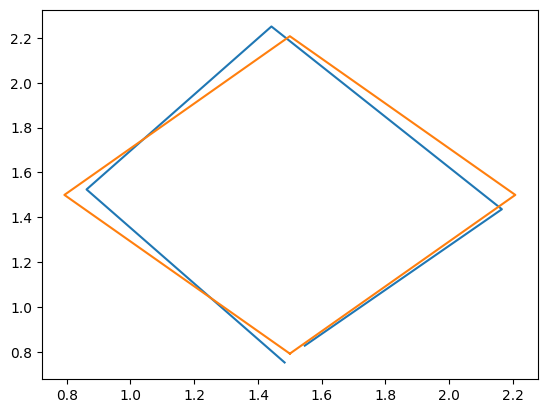

In [14]:
show_new(X1, Y1, X2, Y2)

In [15]:
X2 = np.array([1.0, 2.0, 3.0, 5.0, 1.0])
Y2 = np.array([2.0, 1.0, 2.0, 5.0, 2.0])

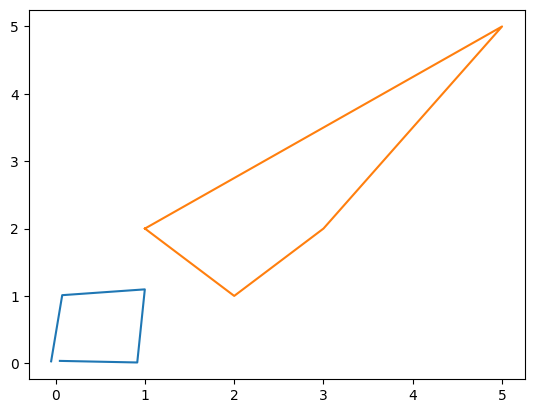

In [16]:
show_old(X1, Y1, X2, Y2)

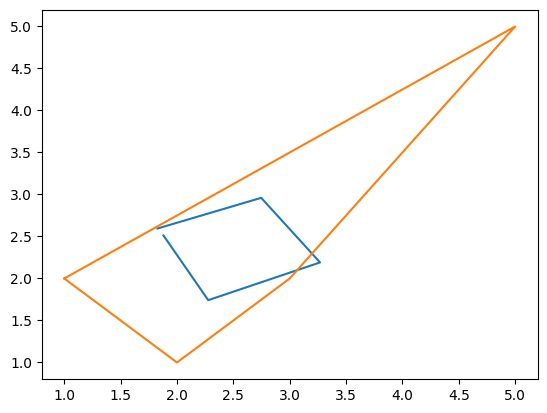

In [17]:
show_new(X1, Y1, X2, Y2)